In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

In [114]:
usa_2016_presidential_election_by_county = pd.read_csv('./data/usa-2016-presidential-election-by-county.csv', sep=';')

In [115]:
usa_2016_presidential_election_by_county.head(3)

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),...,total08,total12,other08,other12,Other12 Frac,Other08 Frac,Rep12 Frac2,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2
0,Alaska,AK,2100,"Haines Borough, Alaska",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nebraska,NE,31145,"Red Willow County, Nebraska",13.0,5061.0,1216.0,952.0,3735.0,3891.0,...,5044.0,4936.0,93.0,93.0,0.018841,0.018438,0.803428,0.754393,0.196572,0.245607
2,California,CA,6015,"Del Norte County, California",18.0,9361.0,4323.0,3791.0,4967.0,4614.0,...,9531.0,8770.0,241.0,365.0,0.041619,0.025286,0.548959,0.534661,0.451041,0.465339


In [149]:
# Get column names to observe the features
for k in usa_2016_presidential_election_by_county.columns:
    print(k)

State
ST
Fips
County
Precincts
Votes
Democrats 08 (Votes)
Democrats 12 (Votes)
Republicans 08 (Votes)
Republicans 12 (Votes)
Republicans 2016
Democrats 2016
Green 2016
Libertarians 2016
Republicans 2012
Republicans 2008
Democrats 2012
Democrats 2008
Less Than High School Diploma
At Least High School Diploma
At Least Bachelors's Degree
Graduate Degree
School Enrollment
Median Earnings 2010
White (Not Latino) Population
African American Population
Native American Population
Asian American Population
Other Race or Races
Latino Population
Children Under 6 Living in Poverty
Adults 65 and Older Living in Poverty
Total Population
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4
Poverty.Rate.below.federal.poverty.threshold
Gini.Coefficient
Child.Poverty.living.in.families.below.the.poverty.line
Management.professional.and.related.occupations
Service.occupations
Sales.and.office.occupations
Farming.fishing.and.forestry.occupations
Construction.extraction.maintenance.and.repair.occupations
Produ

We first analyze the features of the dataset. There are too many to assess as a whole, so let us begin by comparing the votes of the two parties, Republicans and Democrats, as well as the two leading candidates, Hillary Clinton, and Donald Trump by states, as we have done in the primary elections dataset.

In [150]:
# Select relevant features to be assessed
cols_to_keep = ['State', 'County', 'Votes', 'Republicans 2016', 'Democrats 2016', 'Votes16 Trumpd', 'Votes16 Clintonh']
surface_analysis = usa_2016_presidential_election_by_county[cols_to_keep].dropna(subset = cols_to_keep).reset_index(drop = True)
surface_analysis.head(3)

,State,County,Votes,Republicans 2016,Democrats 2016,Votes16 Trumpd,Votes16 Clintonh
0,Nebraska,"Red Willow County, Nebraska",5061.0,83.224659,12.606204,4212.0,638.0
1,California,"Del Norte County, California",9361.0,54.844568,37.228929,5134.0,3485.0
2,Florida,"Duval County, Florida",428734.0,48.995648,47.494950,210061.0,203627.0


In [118]:
print(surface_analysis['Democrats 2016'][0]*(surface_analysis['Votes16 Trumpd'][0]/surface_analysis['Votes16 Clintonh'][0]))

83.22465915826909


We may notice that votes: (Democrats 2016) * (Trump 2016)/(Clinton 2016) = (Republicans 2016)

This suggests the fact that the ratio of (Republicans 2016 to Democrats 2016) = (Trump 2016 to Clinton 2016), hence is the same information once normalized. This is intuitive, since after the primary elections, there is one representative from each party running for the presidential election[*] (ie: Trump for Republicans, Clinton for Democrats). 

[*] See primary_results_analysis.ipynb for further explanation and details 

In this respect, let us remove redundant columns.

In [119]:
surface_analysis = surface_analysis.drop(['Republicans 2016', 'Democrats 2016'], 1).reset_index(drop = True).sort_values(by = 'State')
surface_analysis.head(3)

,State,County,Votes,Votes16 Trumpd,Votes16 Clintonh
1748,Alabama,"Pickens County, Alabama",9494.0,5454.0,3972.0
203,Alabama,"Lauderdale County, Alabama",38813.0,27735.0,9877.0
2879,Alabama,"Cherokee County, Alabama",10503.0,8809.0,1524.0


We now continue by visualizing the information, first by state

Text(0, 0.5, 'Vote Count')

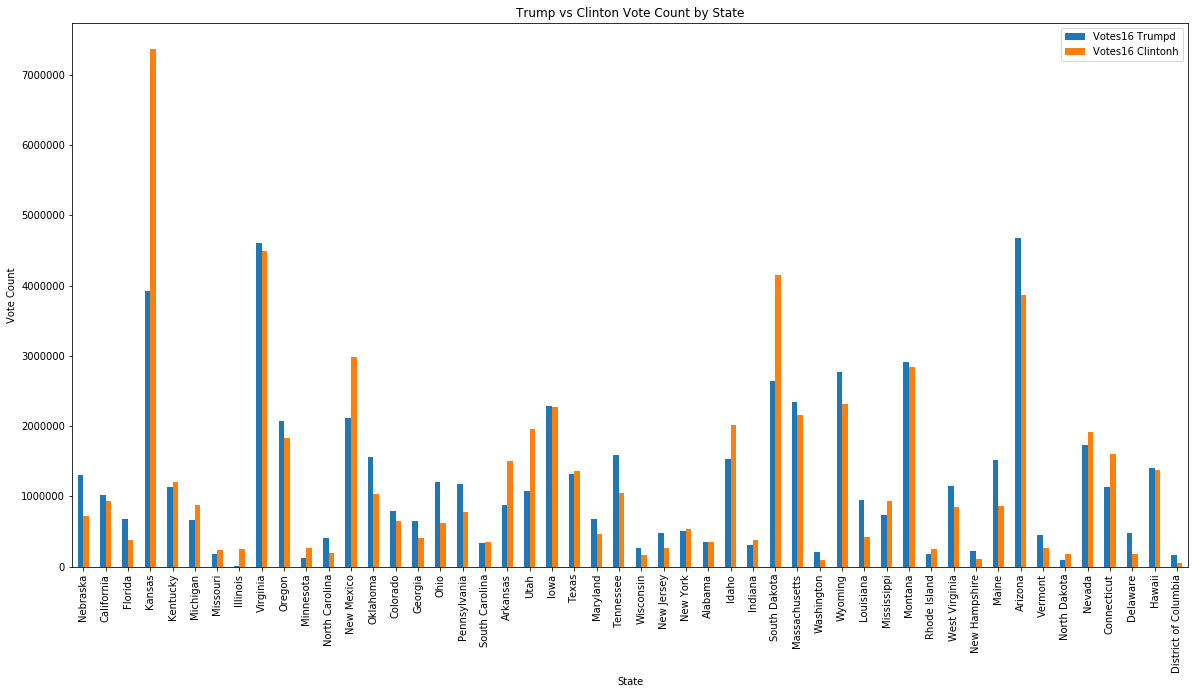

In [152]:
# Retrieve list of vote counts for Donald Trump, grouped by each state (combined counties)
trump = pd.DataFrame.copy(surface_analysis)
trump = trump.drop(['Votes', 'Votes16 Clintonh'], 1)
trump_state = trump.groupby(['State'])['Votes16 Trumpd'].sum()

# Retrieve list of vote counts for Hillary Clinton, grouped by each state (combined counties)
clinton = pd.DataFrame.copy(surface_analysis)
clinton = clinton.drop(['Votes', 'Votes16 Trumpd'], 1)
clinton_state = clinton.groupby(['State'])['Votes16 Clintonh'].sum()

# Prepare for plot
X = surface_analysis['State'].unique()
Y1 = trump_state
Y2 = clinton_state

# Combine trump/clinton's information into new data frame so that we may visualize plots in one-step
trump_clinton_state = pd.DataFrame({'State': X, 'Votes16 Trumpd': Y1, 'Votes16 Clintonh': Y2}).reset_index(drop = True)

# Plot combined information in new data frame
trump_clinton_state.plot(x="State", y = ["Votes16 Trumpd", "Votes16 Clintonh"], kind="bar", figsize = (20, 10), title = "Trump vs Clinton Vote Count by State").set_ylabel('Vote Count')


At first glance, we may notice that states with extreme differences in vote counts are dominated by Clinton. However, the presidential elections of the United States is heavily dependent on the electoral vote, decided by the dominant candidate in each state or district, rather than the nationwide, overall popular vote.

In this manner, we would like to investigate the information further, in detail.

In [172]:
# Create functions to be utilized in panda dataframe's apply function

# Given a state(row), returns the vote ratio(winner's votes/total votes)
def vote_ratio(row):
    vote_total = row['Votes16 Clintonh'] + row['Votes16 Trumpd']
    if row['Votes16 Clintonh'] > row['Votes16 Trumpd']:
        return round((row['Votes16 Clintonh']/vote_total*100), 2)
    elif row['Votes16 Trumpd'] > row['Votes16 Clintonh']:
        return round((row['Votes16 Trumpd']/vote_total*100), 2)
    else:
        return 50.00

# Given a state(row), returns the winner within that state
def winner(row):
    if row['Votes16 Clintonh'] > row['Votes16 Trumpd']:
        return 'Clinton'
    elif row['Votes16 Trumpd'] > row['Votes16 Clintonh']:
        return 'Trump'
    else:
        return 'Tie'

# Create new data frame for presentation
trump_clinton_win_state = pd.DataFrame({'State': X})

# Within the new data frame, create a column of vote ratios and the winner, according to the functions written above
trump_clinton_win_state['Vote_Ratio'] = trump_clinton_state.apply(lambda row: vote_ratio(row), axis = 1)
trump_clinton_win_state['Winner'] = trump_clinton_state.apply(lambda row: winner(row), axis = 1)

print(trump_clinton_win_state)

                   State  Vote_Ratio   Winner
0               Nebraska       64.54    Trump
1             California       52.17    Trump
2                Florida       64.16    Trump
3                 Kansas       65.28  Clinton
4               Kentucky       51.59  Clinton
5               Michigan       56.96  Clinton
6               Missouri       56.00  Clinton
7               Illinois       95.75  Clinton
8               Virginia       50.66    Trump
9                 Oregon       52.96    Trump
10             Minnesota       67.44  Clinton
11        North Carolina       68.22    Trump
12            New Mexico       58.43  Clinton
13              Oklahoma       60.13    Trump
14              Colorado       55.11    Trump
15               Georgia       61.26    Trump
16                  Ohio       65.67    Trump
17          Pennsylvania       60.18    Trump
18        South Carolina       51.45  Clinton
19              Arkansas       63.16  Clinton
20                  Utah       64.

We notice, that vote ratios tend to be less than 65%, and many vote ratios are within the 50% ~ 60% range. Let us verify this rough observation.

In [186]:
vote_ratio_less_than_65 = trump_clinton_win_state.loc[trump_clinton_win_state.Vote_Ratio < 65, 'Vote_Ratio'].count()
vote_ratio_greater_than_65 = trump_clinton_win_state.loc[trump_clinton_win_state.Vote_Ratio >= 65, 'Vote_Ratio'].count()

vote_ratio_less_than_60 = trump_clinton_win_state.loc[trump_clinton_win_state.Vote_Ratio < 60, 'Vote_Ratio'].count()
vote_ratio_greater_than_60 = trump_clinton_win_state.loc[trump_clinton_win_state.Vote_Ratio >= 60, 'Vote_Ratio'].count()

print("Vote ratios less than 65%:", vote_ratio_less_than_65)
print("Vote ratios greater than 65%:", vote_ratio_greater_than_65, "\n")

print("Vote ratios between 50%~60%:", vote_ratio_less_than_60)
print("Vote ratios greater than 60%:", vote_ratio_greater_than_60)

Vote ratios less than 65%: 39
Vote ratios greater than 65%: 11 

Vote ratios between 50%~60%: 26
Vote ratios greater than 60%: 24


Our rough observation was correct. This indicates the fact that, in majority of states, one candidate was not heavily dominant over the other, and the two candidates were quite close in vote counts for numerous states (if defining "heavily dominant" as winning vote ratios > 65%, and "quite close in vote counts" as winning vote ratios < 60%).

We would now like to assess the number of states won by both Donald Trump and Hillary Clinton, as well as the "outliers" (states where one candidate seems to heavily dominate the other).

In [188]:
# Count the number of winning states for both members
number_of_states_won_trump = trump_clinton_win_state.loc[trump_clinton_win_state.Winner == 'Trump', 'Winner'].count()
print("Trump won in", number_of_states_won_trump, "states")
number_of_states_won_clinton = trump_clinton_win_state.loc[trump_clinton_win_state.Winner == 'Clinton', 'Winner'].count()
print("Clinton won in", number_of_states_won_clinton, "states")

Trump won in 29 states
Clinton won in 21 states


Trump won in more states than Clinton. It would be interesting to compare the number of overall, nationwide votes with this result, and see if there are changes in this status, before analyzing the outlier states.

In [192]:
print("Trump's nationwide vote count:", surface_analysis["Votes16 Trumpd"].sum())
print("Clinton's nationwide vote count:", surface_analysis["Votes16 Clintonh"].sum())

Trump's nationwide vote count: 61064602.0
Clinton's nationwide vote count: 62426228.0


Trump actually acquired less nationwide votes than Clinton, but seems to have won the election by superiority in electoral votes. Out of the 58 total elections held so far by the United States, the nationwide favourite won in the electoral votes for 53 elections. Therefore, United State's 2016 presidential election results may be deemed as contradictory to the stereotypical belief, that the decided winner is also the nationwide favourite.